### Линейные методы в машинном обучении

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#### Линейная регрессия

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b \cdot 1$$,
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$ y = <w, x> $$,
где $<\cdot, \cdot>$ -- скалярное произведение векторов.

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ Y = Xw $$,
Y -- вектор размера n, X -- матрица объекты-признаки размера $n \times k$, w -- вектор весов размера k.

Решение по методу наименьших квадратов дает 
$$ w = (X^TX)^{-1}X^TY $$

#### Задание 1

Реализуйте линейную регрессию, которая вычисляет веса признаков по формуле указанной выше

np.linalg.inv() - функция. которая возвращает обратную матрицу

In [7]:
X = np.random.rand(3, 2)
a = np.ones(len(X))

In [16]:
X.T

array([[0.05004708, 0.15026317, 0.7106438 ],
       [0.24133663, 0.67598557, 0.74594854]])

In [8]:
X

array([[0.05004708, 0.24133663],
       [0.15026317, 0.67598557],
       [0.7106438 , 0.74594854]])

In [9]:
a

array([1., 1., 1.])

In [11]:
a = np.ones(len(X))
a = a[:, None]

In [13]:
np.hstack((X, a))

array([[0.05004708, 0.24133663, 1.        ],
       [0.15026317, 0.67598557, 1.        ],
       [0.7106438 , 0.74594854, 1.        ]])

In [17]:
class MyLinearRegression:
    def __init__(self):
        self.w = None
        pass
    
    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1!
        a = np.ones(len(X))
        a = a[:, None]
        X = np.hstack((X, a))
        
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        # В эту переменную нужно сохранить результат:
        #np.dot(  A , B ) == A@B
        # len(self.w) = n_features + 1
        return self
        
        
    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        # Не забудьте про фиктивный признак равный 1!
        a = np.ones(len(X))
        a = a[:, None]
        X = np.hstack((X, a))
        
        y_pred = X @ self.w # Результат предсказания
        return y_pred
    
    def get_weights(self):
        return self.w # тут тоже что-то нужно исправить 

Протестируем нашу модель на искуственных данных

In [19]:
X = np.linspace(10, 20, 100)
y = -3 * X + 100

X_train = X[:50].reshape(-1, 1)
y_train = y[:50] + np.random.randn(50) * 10

X_test = X[50:].reshape(-1, 1)
y_test = y[50:] + np.random.randn(50) * 10

In [20]:
print(X_train.shape)
print(y_train.shape)

(50, 1)
(50,)


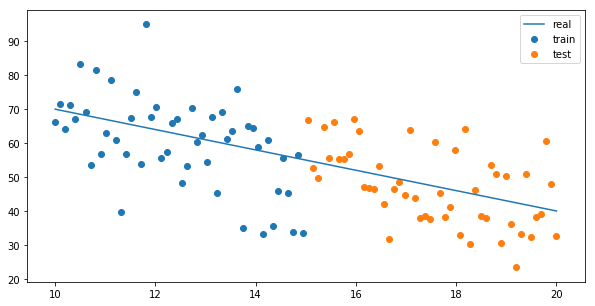

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

In [22]:
reg = MyLinearRegression()
reg.fit(X_train, y_train)

In [23]:
y_pred = reg.predict(X_test)

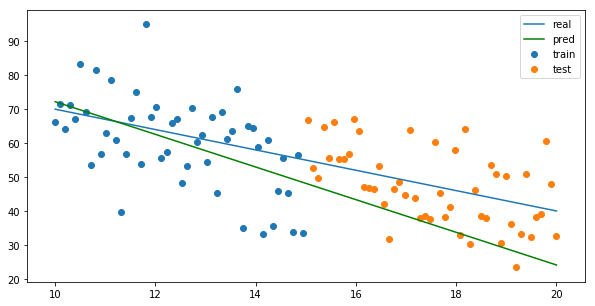

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, reg.predict(X[:, None]), label='pred', color='green')
plt.legend()
plt.show()

#### Задание 2

Обучите вашу модель на тренировочной выборке и предскажите значения на тесте.
Предсказанные ответы сохраните в переменную $\textbf{predictions}$, а веса модели сохраните в переменную $\textbf{w}$

In [31]:
from sklearn.linear_model import LinearRegression

In [34]:
regressor = MyLinearRegression()
reg = LinearRegression()

reg.fit(X_train, y_train)
regressor.fit(X_train , y_train)

Визуализируем предсказания

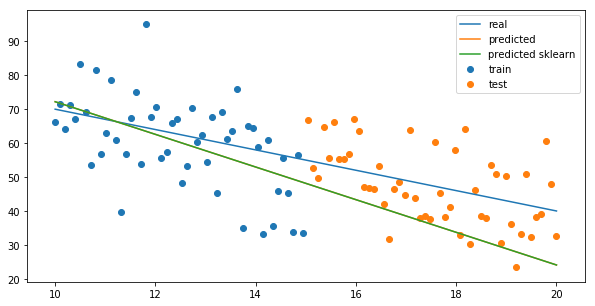

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X.reshape(-1, 1)), label='predicted')
plt.plot(X, reg.predict(X.reshape(-1, 1)), label='predicted sklearn')

plt.legend()
plt.show()

#### Задание 3

Вычислите среднеквадратичную ошибку на трейне и на тесте.
Какие результаты вы ожидаете получить? Какие получились? Почему?

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error #mean_absolute_percentage_error

# ВАШ КОД ЗДЕСЬ

print('Test MSE: ', mean_squared_error(y_test, regressor.predict(X_test.reshape(-1, 1))))
print('Train MSE: ', mean_squared_error(y_test, regressor.predict(X_train.reshape(-1, 1))))

Test MSE:  215.8715048644229
Train MSE:  265.4815612526772


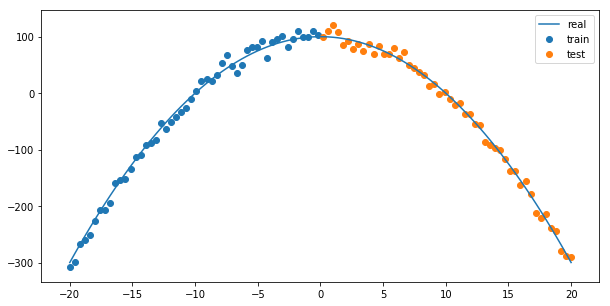

In [40]:
X = np.linspace(-20, 20, 100)
y = -1 * X**2  + 100

X_train = X[:50].reshape(-1, 1)
y_train = y[:50] + np.random.randn(50) * 10

X_test = X[50:].reshape(-1, 1)
y_test = y[50:] + np.random.randn(50) * 10

plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

In [41]:
regressor = MyLinearRegression()
regressor.fit(X_train , y_train)
w = regressor.get_weights()

print(w)

[ 20.84848819 173.70806682]


In [44]:
print('Train MSE: ',mean_squared_error(y_train, regressor.predict(X_train)))
print('Test MSE: ', mean_squared_error(y_test, regressor.predict(X_test)))

Train MSE:  1026.9772914447876
Test MSE:  236000.15287625042


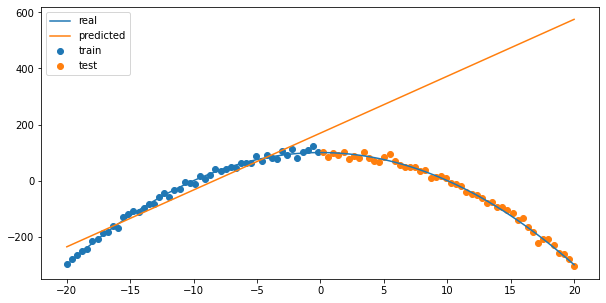

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X.reshape(-1, 1)), label='predicted')
plt.legend()
plt.show()

In [45]:
X = np.vstack([X, X**2])


In [46]:
X_train = X[: , :50]
y_train = y[:50] + np.random.randn(50) * 10

X_test = X[: , 50:]
y_test = y[50:] + np.random.randn(50) * 10


In [47]:
X_train.shape

(2, 50)

In [48]:
regressor = MyLinearRegression()
regressor.fit(X_train.T , y_train)
w = regressor.get_weights()

In [50]:
w

array([ 9.12520860e-02, -1.00662838e+00,  1.00776140e+02])

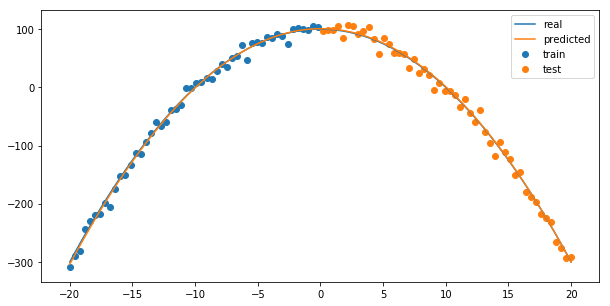

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(X[0], y, label='real')
plt.scatter(X_train[0], y_train, label='train')
plt.scatter(X_test[0], y_test, label='test')
plt.plot(X[0], regressor.predict(X.T), label='predicted')
plt.legend()
plt.show()

In [52]:
# Выведите качество алгоритма

print('Test MSE: ', mean_squared_error(y_test, regressor.predict(X_test.T)))
print('Train MSE: ', )

Test MSE:  105.72550046878027
Train MSE: 


### Ridge&Lasso

На практике точные формулы для подсчета коэффициентов линейной регрессии не используются, а используется метод градиентного спуска который состоит в подсчете производных от ошибки и шагу в направлении наискорейшего убывания функции (напомню, что мы стремимся минимизировать функцию потерь). Эти методы работают быстрее, чем точное вычисление обратных матриц и их перемножение.
Более того, во многих задачах это единственный способ обучить модель, так как не всегда (на самом деле почти никогда) удается выписать точную формулу для минимума сложного функционала ошибки.

Давайте рассмотрим реализации линейных регрессоров в библиотеке sklearn

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Будем работать с датасетом boston

In [4]:
from sklearn.datasets import load_boston

In [11]:
boston_data = load_boston()

In [12]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
X = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
y = boston_data['target']

In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

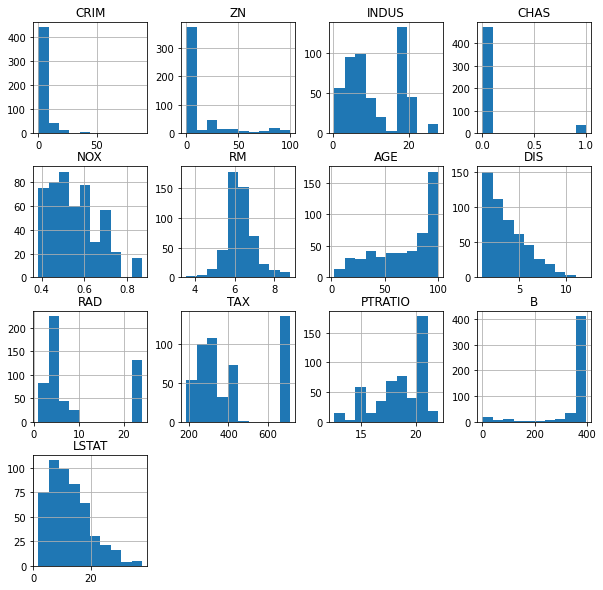

In [19]:
# посторойте гистограммы распределения каждого из признаков ( используйте метод hist()  дополнительно укажите парреметр figsize=(10, 10) )
_= X.hist(figsize=(10, 10))

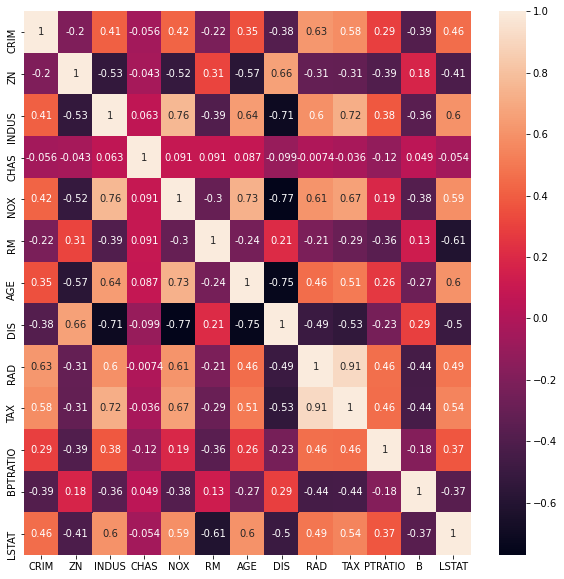

In [20]:
import seaborn as sns

# постройте матрицу корреляции признаков 
_ = plt.subplots(figsize=(10, 10))  # эта строчка нужна для коректного отображения расмеров попробуйте ее убрать и увидите что с ней было лучше
_= sns.heatmap(X.corr() , annot = True )

In [21]:
 #  выведете подматрицу корреляции для признаков ['CRIM', 'TAX', 'DIS']   (вам поможет метод loc) 
X.corr().loc[['CRIM', 'TAX', 'DIS'] , ['CRIM', 'TAX', 'DIS'] ]

,CRIM,TAX,DIS
CRIM,1.000000,0.582764,-0.379670
TAX,0.582764,1.000000,-0.534432
DIS,-0.379670,-0.534432,1.000000


#### Задание 4

Разбейте выборку на train и test в соотношении 70/30.

In [22]:
from sklearn.model_selection import train_test_split

# ВАШ КОД ЗДЕСЬ:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Выполним нормировку данных

In [23]:
X_train.std()

CRIM         9.178089
ZN          22.613664
INDUS        6.981394
CHAS         0.274632
NOX          0.118048
RM           0.699263
AGE         28.661543
DIS          2.111540
RAD          9.017665
TAX        173.376737
PTRATIO      2.142774
B           96.395882
LSTAT        7.316874
dtype: float64

In [24]:
X_train.mean()

CRIM         4.046246
ZN          10.820621
INDUS       11.648814
CHAS         0.081921
NOX          0.561331
RM           6.260556
AGE         69.384181
DIS          3.686106
RAD         10.203390
TAX        422.183616
PTRATIO     18.572034
B          354.497655
LSTAT       12.983390
dtype: float64

In [25]:
from sklearn.preprocessing import StandardScaler # f_i -> (f_i - E f_i) / std(f_i)

scaler = StandardScaler()

# Подобрать "веса" объекта scaler

X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [26]:
X_train.std()

1.0000000000000002

In [27]:
X_train.mean()

2.6008458026681635e-15

#### Задание 5

Обучите линейную регрессию и подсчитайте качество на тесте

In [29]:
regressor = LinearRegression()

# ВАШ КОД ЗДЕСЬ
from sklearn.metrics import mean_squared_error

regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, regressor.predict(X_train)))
print('Test MSE: ', mean_squared_error(y_test, regressor.predict(X_test)))


Train MSE:  20.23015838403295
Test MSE:  26.69171087252231


Визуализируем получившиеся веса

<BarContainer object of 13 artists>

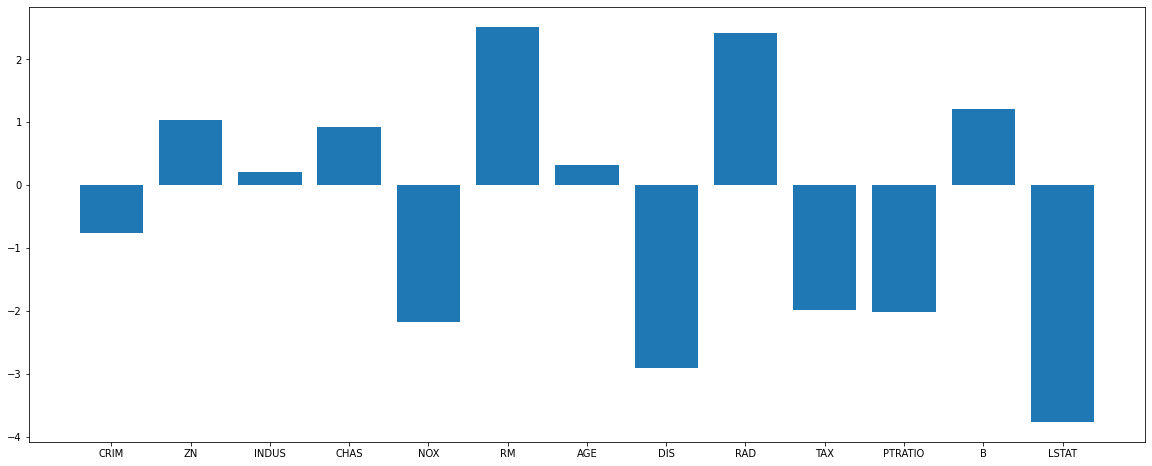

In [30]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, regressor.coef_)

Теперь обратимся к методам с регуляризацией.

Ridge (L2-регуляризация) сильно штрафует за слишком большие веса и не очень за малые. При увеличении коэффициента перед регуляризатором веса меняются плавно

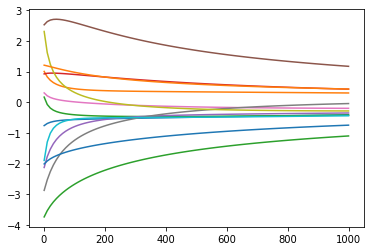

In [31]:
alphas = np.linspace(1, 1000, 100)

weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.show()

Lasso одинаково сильно штрафует малые и большие веса, поэтому при достаточно большом коэффициенте регуляризации многие признаки становятся равными нулю, при этом остаются только наиболее инфромативные. Этот факт можно использовать для решения задачи отбора признаков.

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['CRIM', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['CRIM', 'CHAS', 'RM', 'PTRATIO', 'B', 'LSTAT']
['CHAS', 'RM', 'PTRATIO', 'B', 'LSTAT']
['CHAS', 'RM', 'PTRATIO', 'B', 'LSTAT']
['CHAS', 'RM', 'PTRATIO', 'B', 'LSTAT']
['CHAS', 'RM', 'PTRATIO', 'B', 'LSTAT']


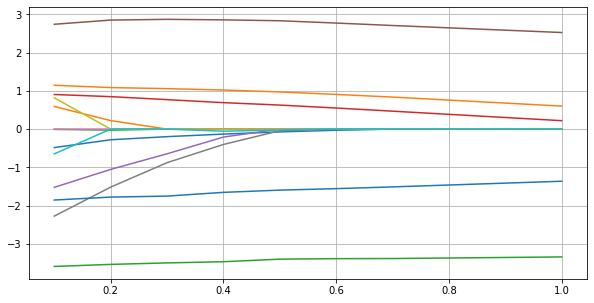

In [32]:
alphas = np.linspace(0.1, 1, 10)

plt.figure(figsize=(10, 5))
weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    lasso_regressor = Lasso(alpha)
    lasso_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, lasso_regressor.coef_.reshape(-1, 1)))
    print([name for (name, coef) in zip(X.columns, lasso_regressor.coef_) if np.abs(coef) > 1e-4])
plt.plot(alphas, weights.T)
plt.grid()
plt.show()

#### Задание 6

Обучите модели Ridge и Lasso и подсчитайте ошибку на тесте. Постарайтесь подобрать лучшие параметры регуляризации

In [35]:

# можно менять этот параметр:
l2_coef = 0.05
ridge = Ridge(l2_coef)
ridge.fit(X_train, y_train)
print('mse ridge: ', mean_squared_error(y_test, ridge.predict(X_test)))

# и этот:
l1_coef = 0.1
lasso = Lasso(l1_coef)
lasso.fit(X_train, y_train)
print('mse lasso: ', mean_squared_error(y_test, lasso.predict(X_test)))

mse ridge:  26.69320956890494
mse lasso:  27.581515810020242


<BarContainer object of 13 artists>

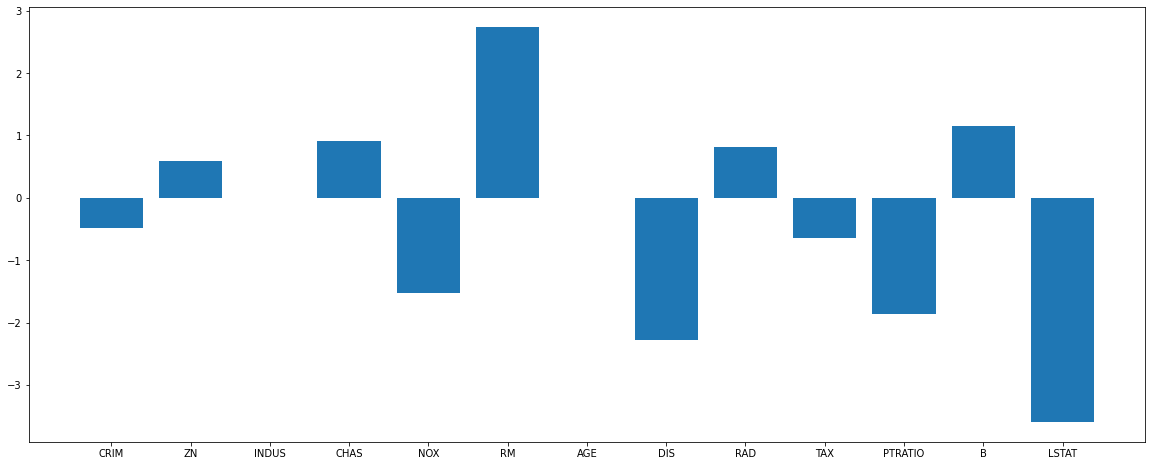

In [36]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, lasso.coef_)

<BarContainer object of 13 artists>

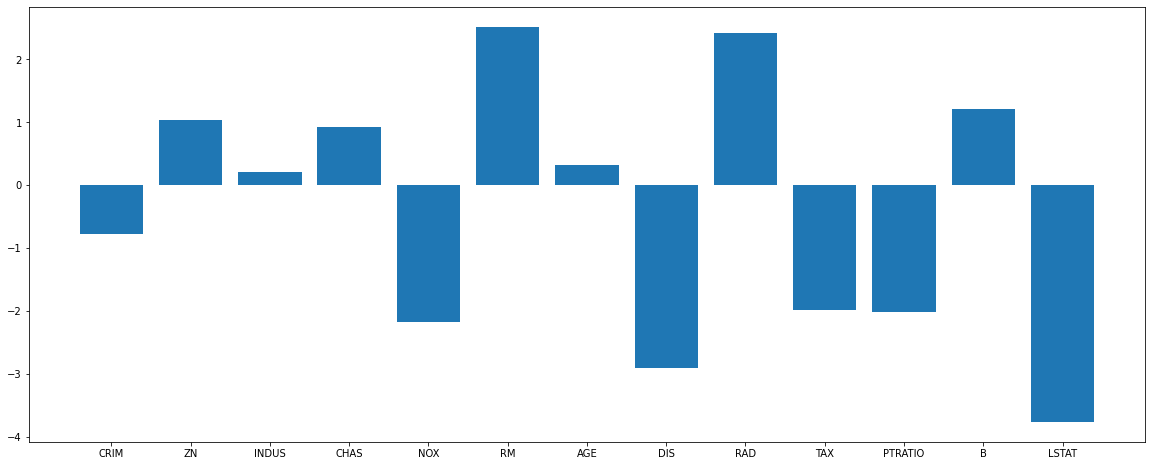

In [37]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, ridge.coef_)

## Линейные методы классификации

Рассмотрим работу алгоритмов линейной классификации для задачи breast cancer

In [38]:
from sklearn.datasets import load_breast_cancer

In [39]:
data = load_breast_cancer()

In [40]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [41]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [44]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

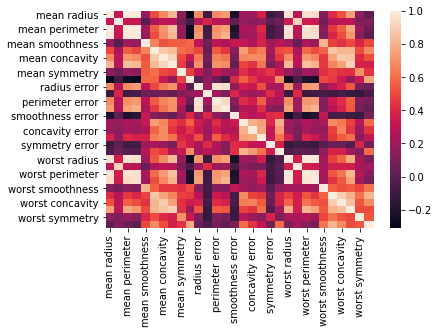

In [45]:
import seaborn as sns
sns.heatmap(X.corr())

Первый метод -- логистическая регрессия. Несмотря на название, данный метод применяется именно в задачах классификации. Регрессия служит указанием на то, что мы пытаемся предсказать вероятность принадлежности классу

#### Задание 7

Разбейте выборку на трейн и тест в соотношении 4:1. Обучите модель и предскажите вероятности классов 0 и 1 (это можно сделать с помощью метода $\textbf{predict_proba}$)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

clf = LogisticRegression(max_iter=10000, )

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42,
)

clf.fit(X_train , y_train)
predictions = clf.predict_proba(X_test)
predictions_classes = clf.predict(X_test)

In [47]:
predictions_classes[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [48]:
predictions_classes[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [49]:
predictions[:10, 1]

array([8.78576378e-01, 2.58335734e-08, 1.51072476e-03, 9.98736853e-01,
       9.99854153e-01, 1.84995748e-10, 5.09401852e-11, 1.92243760e-02,
       9.85526093e-01, 9.94363883e-01])

In [50]:
predictions.shape, predictions_classes.shape

((114, 2), (114,))

Подсчитаем accuracy и roc-auc наших предсказаний

In [51]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

In [52]:
print(accuracy_score(y_test, predictions_classes))

0.956140350877193


In [53]:
for th in [0.1, 0.3, 0.5, 0.7, 0.9]:
    print(th, accuracy_score(y_test, predictions[:, 1] > th))

0.1 0.9473684210526315
0.3 0.956140350877193
0.5 0.956140350877193
0.7 0.9736842105263158
0.9 0.9385964912280702


In [54]:
accuracy_score(y_test, predictions[:, 1] > 0.7)

0.9736842105263158

In [55]:
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

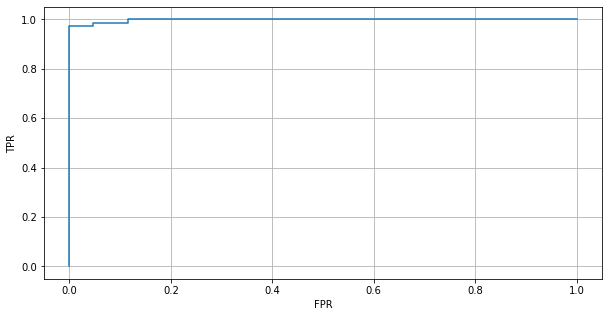

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [57]:
auc

0.9977071732721913

#### Задание 8

Обучите линейный SVM и подсчитайте точность его предсказаний на тесте. Подсчитайте и ROC-AUC. Что можно сказать про эти результаты?

Замечание: чтобы создать классический линейный SVM нужно в качестве параметра в конструктор передать kernel="linear"

In [58]:
from sklearn.svm import SVC, LinearSVC

In [59]:
clf = SVC(kernel="linear", probability=True, )
clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [60]:
predictions = clf.predict_proba(X_test)

In [61]:
for th in [0.1, 0.3, 0.5, 0.7, 0.9]:
    print(th, accuracy_score(y_test, predictions[:, 1] > th))

0.1 0.9473684210526315
0.3 0.9649122807017544
0.5 0.956140350877193
0.7 0.956140350877193
0.9 0.8947368421052632


In [62]:
accuracy_score(y_test, predictions[:, 1] > 0.7)

0.956140350877193

In [63]:
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

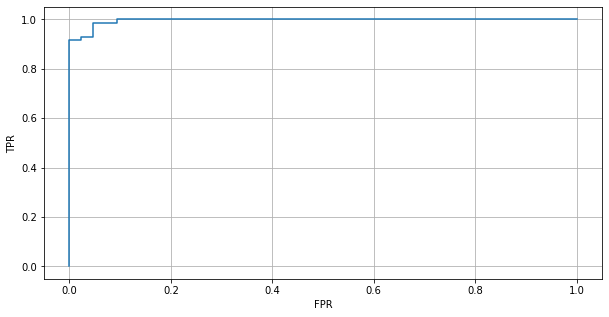

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [65]:
auc

0.9957418932197839

In [66]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([169, 286]))

SVM очень мощный алгоритм и долгое время он использовался почти во всех областях как основной инструмент для построения систем искуственного интеллекта (прямо как нейросети сейчас).

Однако его мощь приносит и немало слабостей. В частности он оказывается довольно чувствительным к шуму в данных и наличию несбалинсированности в классах.

Один из способов побороть вторую проблему -- давать бОльшие веса тем объектам, которых в выборке встречается меньше, тогда при обучении оба класса будут иметь одинаковый вклад в функцию потерь и модель будет обучаться лучше.

#### Задание 8-2

Разберитесь какой аргумент нужно передать в конструктор, чтобы модель боролась с несбалансированностью классов и обучите ее. Получилось ли улучшить качество?

In [67]:
clf = SVC(class_weight='balanced' , probability=True)

In [68]:
clf.fit(X_train , y_train)

SVC(class_weight='balanced', probability=True)

In [69]:
predictions = clf.predict_proba(X_test)

In [75]:
predictions = clf.predict_proba(X_test)
accuracy_score(y_test, predictions[:, 1] > 0.3)

0.9473684210526315

In [76]:
predictions = clf.predict_proba(X_test)
print(accuracy_score(y_test, predictions[:, 1] > 0.3))
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

0.9473684210526315


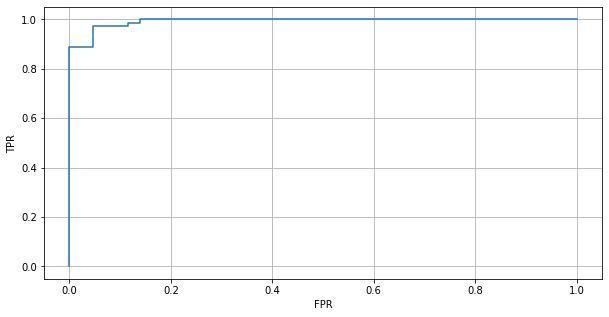

In [77]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [78]:
auc

0.9924664264657713

#### Задание 9

Побороть шум и улучшить сходимость модели помогает нормировка признаков. Выполните ее и обучите предыдущую модель.

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Подобрать "веса" объекта scaler
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
clf = SVC(kernel="linear", probability=True, class_weight = 'balanced')
clf.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True)

In [87]:
predictions = clf.predict_proba(X_test)
print(accuracy_score(y_test, predictions[:, 1] > 0.7))
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

0.9649122807017544


In [88]:
auc

0.9967245332459875

### Pipeline

In [91]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [92]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

In [94]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [95]:
pipe.score(X_test, y_test)

0.9824561403508771

## Задание 10*

Возьмем датасет содержащий информацию о клиентах и маркетинговой кампании некоторого банка. Задача - предсказать успешность кампании для каждого клиента (воспользуется услугой или нет) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# Считаем данные
# data = pd.read_csv('bank-additional-full.csv', sep=';')
data = pd.read_csv('https://github.com/h2oai/h2o-2/raw/master/smalldata/bank-additional-full.csv', sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()

# Бинаризуем таргет
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

binarizer = LabelBinarizer()
y = binarizer.fit_transform(y).ravel()

In [6]:
binarizer.inverse_transform(np.array([0, 1]))

array(['no', 'yes'], dtype='<U3')

Классы очень несбалансированы:

In [7]:
y.mean()

0.11265417111780131

Заметим, что среди признаков достаточно много категориальных, в то время как линейные модели работают с числовыми признаками.

Одним из способов получить числовые значения категориальных параметров является One-hot encoding. Его суть состоит в том, что для каждого категориального признака $f$ и каждого его значения $v$ создается новый признак, который равен 1 если у объекта значение $f$ равно $v$ и 0 иначе.

One-hot encoding с помощью pandas можно сделать одной строчкой:

In [8]:
X = pd.get_dummies(X, drop_first=True)

# Обратите внимание на признаки
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

Разобьем выборку на трейн и тест

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Обучим линейный SVM

In [10]:
from sklearn.svm import LinearSVC

In [12]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [13]:
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred))

Test accuracy:  0.906409322651129
Test F measure:  0.3914759273875296


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Логистическая регрессия

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred = model_logistic.predict_proba(X_test)[:, 1]
print('Test accuracy: ', accuracy_score(y_test, y_pred > 0.5))
print('Test F measure: ', f1_score(y_test, y_pred >0.5))
print('Test ROC-AUC: ', roc_auc_score(y_test, y_pred))

Test accuracy:  0.9079873755765963
Test F measure:  0.4822404371584699
Test ROC-AUC:  0.925048054457981


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Попробуем автоматически подобрать параметры

In [25]:
params = {
    'penalty': ['l1', 'l2'],             
    'C': [0.01, 1],
    # 'maxiter' : [100, 1000, 10**4]
}

grid_searcher = GridSearchCV(LogisticRegression(solver='liblinear'), params, scoring='f1', cv=5,
                            verbose=4)

In [26]:
grid_searcher.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END .............................C=0.01, penalty=l1; total time=   8.3s


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END .............................C=0.01, penalty=l1; total time=   7.6s


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END .............................C=0.01, penalty=l1; total time=   5.3s


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END .............................C=0.01, penalty=l1; total time=   6.3s


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END .............................C=0.01, penalty=l1; total time=   6.3s
[CV 1/5] END .............................C=0.01, penalty=l2; total time=   0.2s
[CV 2/5] END .............................C=0.01, penalty=l2; total time=   0.3s
[CV 3/5] END .............................C=0.01, penalty=l2; total time=   0.2s
[CV 4/5] END .............................C=0.01, penalty=l2; total time=   0.2s
[CV 5/5] END .............................C=0.01, penalty=l2; total time=   0.2s


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END ................................C=1, penalty=l1; total time= 1.2min


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END ................................C=1, penalty=l1; total time= 1.4min


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END ................................C=1, penalty=l1; total time= 1.0min


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END ................................C=1, penalty=l1; total time=  59.0s


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END ................................C=1, penalty=l1; total time= 1.2min
[CV 1/5] END ................................C=1, penalty=l2; total time=   0.4s
[CV 2/5] END ................................C=1, penalty=l2; total time=   0.3s
[CV 3/5] END ................................C=1, penalty=l2; total time=   0.2s
[CV 4/5] END ................................C=1, penalty=l2; total time=   0.2s
[CV 5/5] END ................................C=1, penalty=l2; total time=   0.2s


/Users/alexandermarkov/anaconda3/envs/MADMO/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 1], 'penalty': ['l1', 'l2']}, scoring='f1',
             verbose=4)

In [27]:
clf = grid_searcher.best_estimator_

In [28]:
grid_searcher.best_params_

{'C': 1, 'penalty': 'l1'}

In [29]:
clf =  LogisticRegression(**grid_searcher.best_params_, solver='liblinear')

In [30]:
results = grid_searcher.cv_results_

In [31]:
results['mean_test_score']

array([0.4972911 , 0.50557636, 0.51576606, 0.50856571])